# Naive Bayes Classifier on IMDB Review Data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
import nltk
import seaborn as sns

In [3]:
#Read data
data = pd.read_csv("./data/IMDB Dataset.csv")

In [4]:
data.columns

Index(['review', 'sentiment'], dtype='object')

## checking the frequency of positive and negative reviewes

In [5]:
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

* This is a Balanced Dataset

In [6]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantxt = re.sub(cleanr, ' ', sentence)
    return cleantxt

def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

### Text Preprocessing
* Removing stop words from reviews
* Removing HTML Tags and punctuations
* Get a stem word

In [7]:

sno = nltk.stem.SnowballStemmer("english")
stop = set(stopwords.words("english"))
all_positive_words = []
all_negative_words = []
final_string = []
str1 = ''
i = 0
for string in data["review"].values:
    filtered_sentence = []
    # Removes html tags from every review
    sent = cleanHtml(string)
    for w in sent.split():
        # For every word in a review clean punctions
        for cleanwords in cleanpunc(w).split():
            # if cleaned is alphabet and length og words greater than 2 then proceed
            if ((cleanwords.isalpha()) and len(cleanwords)>2):
                # check weather word is stop word or not
                if cleanwords.lower() not in stop:
                    # If word is not stop word then append it to filtered sentence
                    s = (sno.stem(cleanwords.lower())).encode('utf-8')
                    filtered_sentence.append(s)
                    if (data["sentiment"].values)[i].lower() == "positive":
                        all_positive_words.append(s)
                    if (data["sentiment"].values)[i].lower() == "negative":
                        all_negative_words.append(s)
                else:
                    continue
            else:
                continue
    # filtered_sentence is list contains all words of a review after preprocessing
    # join every word in a list to get a string format of the review
    str1 = b" ".join(filtered_sentence)
    #append all the string(cleaned reviews)to final_string
    final_string.append(str1)
    i += 1        

In [8]:
print(len(all_positive_words))
print(len(all_negative_words))

2923508
2848517


/home/ganesh/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


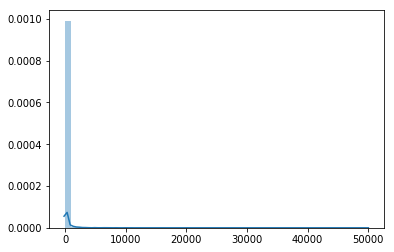

In [20]:
from collections import Counter
count = list(Counter(all_positive_words).values())
sns.distplot(count)

* Replacing the cleaned text to Data Frame
* Replace lables with int values
* positive = 1
* negative = 0

In [21]:
data["review"] = final_string

In [22]:
def conv_label(label):
    if label.lower() == "positive":
        return 1
    elif label.lower() == "negative":
        return 0

data["sentiment"] = data["sentiment"].map(conv_label)

In [23]:
data.head(3)

,review,sentiment
0,b'one review mention watch episod youll hook r...,1
1,b'wonder littl product film techniqu fashion g...,1
2,b'thought wonder way spend time hot summer wee...,1


In [24]:
freq_pos_words = nltk.FreqDist(all_positive_words)
freq_neg_words = nltk.FreqDist(all_negative_words)

* Here word "good" is present in both positive and negative reviews.
* It's likely contains "Not good" in negative a review, but due to uni gram we are loosing this information.
* So It's better to use n-grams where n>=2

In [25]:
freq_pos_words.most_common(20)

[(b'film', 49861),
 (b'movi', 44091),
 (b'one', 27628),
 (b'like', 20043),
 (b'time', 15973),
 (b'good', 14879),
 (b'see', 14854),
 (b'stori', 13877),
 (b'charact', 13804),
 (b'great', 13228),
 (b'make', 13222),
 (b'watch', 12782),
 (b'get', 12625),
 (b'love', 12322),
 (b'well', 11903),
 (b'show', 10958),
 (b'also', 10767),
 (b'realli', 10717),
 (b'would', 10393),
 (b'play', 9955)]

In [26]:
freq_neg_words.most_common(20)

[(b'movi', 57146),
 (b'film', 43977),
 (b'one', 26303),
 (b'like', 24083),
 (b'bad', 15519),
 (b'make', 15474),
 (b'even', 15366),
 (b'get', 15219),
 (b'watch', 14888),
 (b'time', 14818),
 (b'good', 14571),
 (b'charact', 14173),
 (b'would', 13660),
 (b'see', 13023),
 (b'realli', 12323),
 (b'look', 11407),
 (b'scene', 11182),
 (b'stori', 10798),
 (b'act', 10314),
 (b'dont', 10291)]

In [27]:
#Bag of words vector with bi-grams
count_vect = CountVectorizer(ngram_range = (1, 2))
count_vect = count_vect.fit(data["review"].values)
bigram_wrds = count_vect.transform(data["review"].values)

In [28]:
#TF-Idf vector using bi-grams
count_vect_tfidf = TfidfVectorizer(ngram_range = (1, 2))
count_vect_tfidf = count_vect_tfidf.fit(data["review"].values)
tfidf_wrds = count_vect_tfidf.transform(data["review"].values)

In [94]:
bigram_wrds

<50000x2579569 sparse matrix of type '<class 'numpy.int64'>'
	with 10176883 stored elements in Compressed Sparse Row format>

acc is on test data: 88.62
train accuracy is: 98.86571428571429
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7411
           1       0.91      0.87      0.88      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



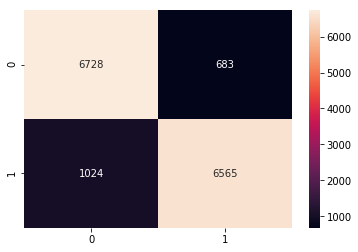

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
# X = bigram_wrds
X = tfidf_wrds
Y = data["sentiment"]
x_l, x_test, y_l, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.7)
clf.fit(x_l, y_l)
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd')
train_acc = accuracy_score(y_l, clf.predict(x_l), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred))

### BOW
* alpha: 0.7
* Test accuracy: 88.62 
* Train accuracy: 99.77

### TF-IDF
* alpha: 0.7
* Test accuracy: 88.98
* Trina accuracy: 98.86

In [157]:
import pickle as pkl
f = open('my_classifier.pickle', 'wb')
pkl.dump(clf, f)
f.close()

In [196]:
import pickle as pkl
f = open('my_datar.pickle', 'wb')
pkl.dump(count_vect, f)
f.close()

In [45]:
test_q = ["This is with very bad action sequences and lot more fun is there", "This is with very good action sequences and lot more fun is there"]

In [49]:
# count_vect_tfidf = TfidfVectorizer(ngram_range = (1, 2))
# tfidf_wrds = count_vect_tfidf.fit_transform(test_q)
vector = TfidfVectorizer(vocabulary = count_vect_tfidf.vocabulary_)
result = clf.predict(count_vect_tfidf.transform(test_q))

In [53]:
vec_res = count_vect_tfidf.transform(test_q)